# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from lab_1_utils import exercise_1_workflow, exercise_2_worflow

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

Pour connaitre l'étape N, il suffit de connaitre le nombre de particules dans la boite 0 à l'étape n-1 et la particulle qui à été tiré à l'étape n. Ainsi $P(X_{n} | X_{n-1}, ..., X_{0}) = P(X_{n} | X_{n-1})$.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

Il n'y a qu'une seule classe de communication, donc la chaîne de markov est irréductible.

La chaîne de Markov est périodique de période 2.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

De plus $ \forall i,j \in [|1, n|] $, $$ P(X_{n+1}=j | X_{n}=i) =  \left
                                                                        \begin{array}{ll}
                                                                            \frac{K-i}{K} & si j= i+1 \\
                                                                            \frac{i}{k} & \si j = i-1 \\
                                                                            0 & sinon.
                                                                        \end{array}
                                                                    \right. $$

In [7]:
K = 30
workflow_1 =  exercise_1_workflow(K)

workflow_1.initialize_P()

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [8]:
from scipy.stats import binom
binom_stat = binom(K, 0.5)

if workflow_1.check_invariant_distribution(binom_stat):
    print("Cette distribution est bien invariante pour notre système.")
else:
    print("Cette distribution n'est pas invariante pour notre système.")

Cette distribution est bien invariante pour notre système.


5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

In [9]:
workflow_1.ehrenfest(5000)

8\. a) Modify the function defined in 1. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [10]:
workflow_1.T

On remarque que T est nul, il n'y a pas eu de retour à 0

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In [11]:
### Faire en parallèle

for i in range(5):
    T = 0
    wf = exercise_1_workflow(K=10)
    wf.ehrenfest(n_max=5000, show=False)
    if wf.T is not None:
        T += wf.T
print(T/5)

32.4


8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

...

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu$ and transition matrix $P$

$$
     \mu = [0, 1, 0], 
     %
     \quad
     %
     P = \begin{pmatrix}
       0.2 & 0.7 & 0.1 \\
	 	   0.9 & 0   & 0.1 \\
       0.2 & 0.8 & 0   \\
     \end{pmatrix}.
 $$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

Une seule classe de communication donc chaîne de markov irréductible. Elle est apériodique (tous les états communiquent en 1 étape)

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [12]:
workflow_2 = exercise_2_worflow()

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

In [51]:
workflow_2.simulate_dthmc(n_max=2000)

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

In [118]:
workflow_2.compute_invariant_distribution()

La distribution invariante est unique.
La distribution invariante est : [0.49197861 0.4171123  0.09090909]


Les historgrammes sont extremement similaire, nous pouvons faire l'hypothèse que cette distribution invariante est la distribution limite de cette chaîne de Markov. 

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


In [119]:
workflow_2.compute_probability_distribuction(100)

In [121]:
workflow_2.check_invariant_distribution()

La distribution de X(n) tend vers la distribution invariante obtenue à la question 5 : [0.49197861 0.4171123  0.09090909]


5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 1, \dotsc , 3$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?
  

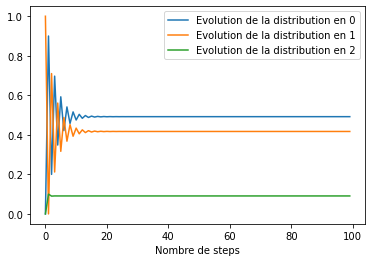

In [76]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_mu[:,0],label="Evolution de la distribution en 0")
plt.plot(history_mu[:,1],label = "Evolution de la distribution en 1")
plt.plot(history_mu[:,2],label = "Evolution de la distribution en 2")
plt.xlabel("Nombre de steps")
plt.legend()
plt.show()

On remarque que $\mu_{n}(i)$ converge très rapidement vers $\pi$. Le régime transitoire dure un peut moins de 20 steps puis le régime est stationnaire avec $\mu = \pi$

In [84]:
normalized_vector

array([0.49197861, 0.4171123 , 0.09090909])

In [87]:
n_max = 10
history_pi = np.tile(normalized_vector, (history_mu.shape[0],1))

In [89]:
history_norm = np.linalg.norm(history_mu - history_pi,ord=1,axis=1)

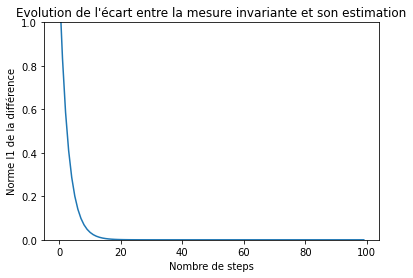

In [90]:
plt.figure()
plt.plot(history_norm)
plt.title("Evolution de l'écart entre la mesure invariante et son estimation")
plt.xlabel("Nombre de steps")
plt.ylabel("Norme l1 de la différence")
plt.ylim(0,1)
plt.show()

La convergence vers $\pi$ est très rapide !

6\. For each state $i \in \{1, \dotsc, 5 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

In [92]:


theoricalTempsRetour = [1/v for v in normalized_vector]
print(f"Moyenne du temps de retour en 0 : {round(theoricalTempsRetour[0],2)}")
print(f"Moyenne du temps de retour en 1 : {round(theoricalTempsRetour[1],2)}")
print(f"Moyenne du temps de retour en 2 : {round(theoricalTempsRetour[2],2)}")

Moyenne du temps de retour en 0 : 2.03
Moyenne du temps de retour en 1 : 2.4
Moyenne du temps de retour en 2 : 11.0
